ЭДС в отсутствии потока газа: (mVDC)
- это значение будет позже вычитаться из всех показаний вольтметра

выставили давление 4 атм и ждем 5 минут

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [24]:
def get_latex_table (array, n_round, caption=None, label=None):
    # Определяем количество столбцов
    num_cols = len(array[0])

    # Создаем шапку таблицы
    latex_table = "\\begin{table}[H]\n"
    latex_table += "\\centering\n"
    if caption != None: 
        latex_table += "\\caption{"
        latex_table += caption
        latex_table += "}\n"

    if label != None: 
        latex_table += "\\label{"
        latex_table += label
        latex_table += "}\n"

    latex_table += "\\begin{tabular}{|"

    for i in range(num_cols):
        latex_table += "c|"
    latex_table += "}\n"
    
    latex_table += "\\hline\n"

    # заголовок
    latex_table += " & ".join(str(elem) for elem in array[0])
    latex_table += " \\\\ \\hline\n"

    # Добавляем строки массива
    for row in np.transpose(array[1:]):
        latex_table += " & ".join(str(round(elem, n_round)) for elem in row)
        latex_table += " \\\\ \\hline\n"
    
    latex_table += "\\end{tabular}\n"
    latex_table += "\\end{table}"
    
    print (latex_table)
    return latex_table


In [25]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

In [26]:
V_1 = [15, 154, 127, 102, 82, 63, 43]                    # uV    
T_1 = [20.08, 20.15, 20.23, 20.31, 20.39, 20.48, 20.58]  # C
P_1 = [0, 4, 3.49, 3, 2.5, 2, 1.5]                       # bar

In [27]:
V_2 = [23, 140, 114, 95, 70, 50, 32]                    # uV
T_2 = [30.08, 30.04, 30.01, 30.01, 30.00, 30.00, 30.0]  # C 
P_2 = [0, 4.1, 3.5, 3, 2.5, 2, 1.5]                     # bar 

In [28]:
V_3 = [19, 105, 77, 57, 43, 29, 21]                     # uV
T_3 = [50.04, 50.01, 50.00, 50.00, 50.00, 50.00, 50.00] # C
P_3 = [0, 4.3, 3.5, 3, 2.5, 2, 1.6]                     # bar

In [29]:
sigma_sens_dv_dt = 0.3 * 10**(-6) # V / C
sens_1 = np.mean([39.8, 40.7]) * 10**(-6)
sigma_sens1 = sigma_sens_dv_dt * np.sqrt(2)

sens_2 = np.mean ([40.7, 41.5]) * 10**(-6)
sigma_sens2 = sigma_sens1

sens_3 = np.mean ([42.4, 43.2]) * 10**(-6)
sigma_sens3 = sigma_sens1

In [30]:
uV_1 = [V * 1e6 for V in V_1]
get_latex_table ([["V, мкВ", "T, $^\\circ C$", "$\\Delta P$, атм"], V_3, T_3, P_3], 1, )

\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|}
\hline
V, мкВ & T, $^\circ C$ & $\Delta P$, атм \\ \hline
19.0 & 50.0 & 0.0 \\ \hline
105.0 & 50.0 & 4.3 \\ \hline
77.0 & 50.0 & 3.5 \\ \hline
57.0 & 50.0 & 3.0 \\ \hline
43.0 & 50.0 & 2.5 \\ \hline
29.0 & 50.0 & 2.0 \\ \hline
21.0 & 50.0 & 1.6 \\ \hline
\end{tabular}
\end{table}


'\\begin{table}[H]\n\\centering\n\\begin{tabular}{|c|c|c|}\n\\hline\nV, мкВ & T, $^\\circ C$ & $\\Delta P$, атм \\\\ \\hline\n19.0 & 50.0 & 0.0 \\\\ \\hline\n105.0 & 50.0 & 4.3 \\\\ \\hline\n77.0 & 50.0 & 3.5 \\\\ \\hline\n57.0 & 50.0 & 3.0 \\\\ \\hline\n43.0 & 50.0 & 2.5 \\\\ \\hline\n29.0 & 50.0 & 2.0 \\\\ \\hline\n21.0 & 50.0 & 1.6 \\\\ \\hline\n\\end{tabular}\n\\end{table}'

In [31]:
V_1 = [v * 1e-6 for v in V_1]
V_2 = [v * 1e-6 for v in V_2]
V_3 = [v * 1e-6 for v in V_3]

T_1 = [T + 273.15 for T in T_1]
T_2 = [T + 273.15 for T in T_2]
T_3 = [T + 273.15 for T in T_3]

# P_1 = [P * 1e5 for P in P_1]
P_1 = [P - P_1[0] for P in P_1]
# P_2 = [P * 1e5 for P in P_2]
P_2 = [P - P_2[0] for P in P_2]
# P_3 = [P * 1e5 for P in P_3]
P_3 = [P - P_3[0] for P in P_3]

P_1 = P_1[1:]
P_2 = P_2[1:]
P_3 = P_3[1:]

T_1 = T_1[1:]
T_2 = T_2[1:]
T_3 = T_3[1:]

V_1 = V_1[1:]
V_2 = V_2[1:]
V_3 = V_3[1:]

In [32]:
delta_T_1 = [v_1 / sens_1 for v_1 in V_1]
delta_T_2 = [v_2 / sens_2 for v_2 in V_2]
delta_T_3 = [v_3 / sens_3 for v_3 in V_3]

sigmas_delta_T_1 = [v_1 / sens_1**2 * sigma_sens1 for v_1 in V_1]
sigmas_delta_T_2 = [v_2 / sens_2**2 * sigma_sens2 for v_2 in V_2]
sigmas_delta_T_3 = [v_3 / sens_3**2 * sigma_sens3 for v_3 in V_3]

# sigmas_P = [0.1 * 1e5] * len(P_1) # Pa
sigmas_P = [0.1] * len(P_1) # Pa

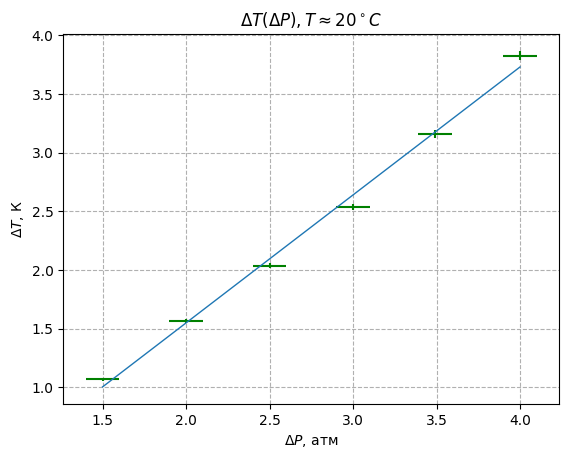

In [33]:
plt.figure()
plt.xlabel("$\Delta P$, атм")
plt.ylabel("$\Delta T$, К")
plt.title('$\Delta T(\Delta P), T \\approx 20 ^\circ C$')
plt.grid(True, linestyle = '--')
plt.errorbar(P_1, delta_T_1, xerr= sigmas_P,yerr=sigmas_delta_T_1, color = 'g', ls = "None")
k, b, kerr, berr = LeastSquares (P_1, delta_T_1)
x = np.array ([P_1[0], P_1[-1]])
plt.plot (x, k*x + b, "-", linewidth = 1)
plt.show()
k_1 = k / 1e5
sigma_k_1 = kerr / 1e5

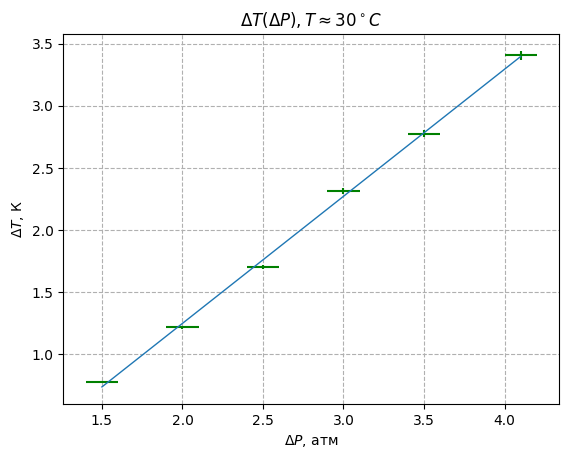

In [34]:
plt.figure()
plt.xlabel("$\Delta P$, атм")
plt.ylabel("$\Delta T$, К")
plt.title('$\Delta T(\Delta P), T \\approx 30 ^\circ C$')
plt.grid(True, linestyle = '--')
plt.errorbar(P_2, delta_T_2, xerr= sigmas_P,yerr=sigmas_delta_T_2, color = 'g', ls = "None")
k, b, kerr, berr = LeastSquares (P_2, delta_T_2)
x = np.array ([P_2[0], P_2[-1]])
plt.plot (x, k*x + b, "-", linewidth = 1)
plt.show()
k_2 = k / 1e5
sigma_k_2 = kerr / 1e5

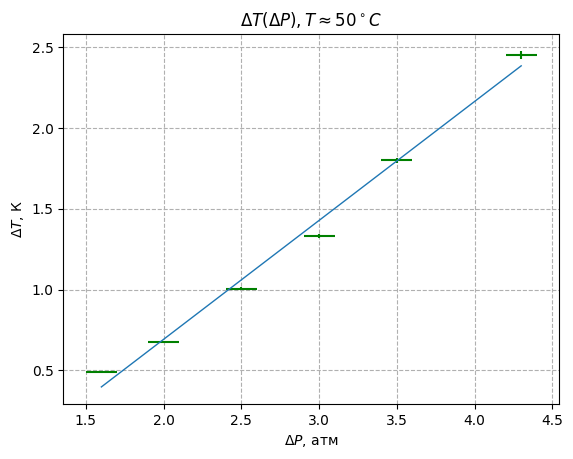

In [35]:
plt.figure()
plt.xlabel("$\Delta P$, атм")
plt.ylabel("$\Delta T$, К")
plt.title('$\Delta T(\Delta P), T \\approx 50 ^\circ C$')
plt.grid(True, linestyle = '--')
plt.errorbar(P_3, delta_T_3, xerr= sigmas_P,yerr=sigmas_delta_T_3, color = 'g', ls = "None")
k, b, kerr, berr = LeastSquares (P_3, delta_T_3)
x = np.array ([P_3[0], P_3[-1]])
plt.plot (x, k*x + b, "-", linewidth = 1)
plt.show()
k_3 = k / 1e5
sigma_k_3 = kerr / 1e5

In [36]:
Ts = [np.mean(T_1), np.mean(T_2), np.mean(T_3)]
sigmas_T = [np.std(T_1), np.std(T_2), np.std(T_3)]
mu = [-k_1 * 1e5, -k_2 * 1e5, -k_3 * 1e5]
sigmas_mu = [sigma_k_1 * 1e5, sigma_k_2 * 1e5, sigma_k_3 * 1e5]

In [37]:
get_latex_table([["$T, K$", "$k, \\text{К/атм}$", "$\\mu, \\text{К/атм}$", "$\\sigma_\\mu, \\text{К/атм}$", "$\\varepsilon_\\mu, %$"],
                 Ts,
                 [k_1 * 1e5, k_2 * 1e5, k_3 * 1e5],
                 mu,
                 sigmas_mu,
                 [sigma_k_1/k_1*100, sigma_k_2/k_2*100, sigma_k_3/k_3*100]], 2, "Коэффициенты Джоуля-Томсона для разных T")

\begin{table}[H]
\centering
\caption{Коэффициенты Джоуля-Томсона для разных T}
\begin{tabular}{|c|c|c|c|c|}
\hline
$T, K$ & $k, \text{К/атм}$ & $\mu, \text{К/атм}$ & $\sigma_\mu, \text{К/атм}$ & $\varepsilon_\mu, %$ \\ \hline
293.51 & 1.09 & -1.09 & 0.04 & 3.7 \\ \hline
303.16 & 1.02 & -1.02 & 0.02 & 2.0 \\ \hline
323.15 & 0.74 & -0.74 & 0.04 & 4.91 \\ \hline
\end{tabular}
\end{table}


'\\begin{table}[H]\n\\centering\n\\caption{Коэффициенты Джоуля-Томсона для разных T}\n\\begin{tabular}{|c|c|c|c|c|}\n\\hline\n$T, K$ & $k, \\text{К/атм}$ & $\\mu, \\text{К/атм}$ & $\\sigma_\\mu, \\text{К/атм}$ & $\\varepsilon_\\mu, %$ \\\\ \\hline\n293.51 & 1.09 & -1.09 & 0.04 & 3.7 \\\\ \\hline\n303.16 & 1.02 & -1.02 & 0.02 & 2.0 \\\\ \\hline\n323.15 & 0.74 & -0.74 & 0.04 & 4.91 \\\\ \\hline\n\\end{tabular}\n\\end{table}'

In [38]:
Ts = [1 / t for t in Ts]

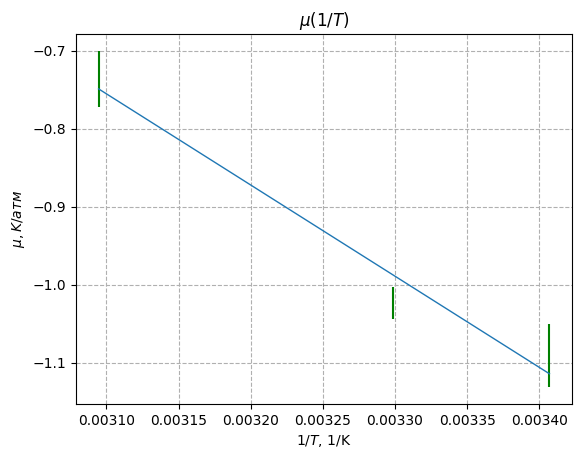

-1169.0692687557166

In [39]:
plt.figure()
plt.xlabel("$1/T$, 1/K")
plt.ylabel("$\\mu, K/атм$")
plt.title('$\\mu (1/T)$')
plt.grid(True, linestyle = '--')
plt.errorbar(Ts, mu, yerr=sigmas_mu, color = 'g', ls = "None")
k, b, kerr, berr = LeastSquares (Ts, mu)
x = np.array ([Ts[0], Ts[-1]])
plt.plot (x, k*x + b, "-", linewidth = 1)
plt.show()
k_coeff = k / 1e5
k

In [46]:
a = k * 8.31 * 37.1 / 2 / 1e5
a

-1.802126123133281

In [54]:
bs = [- m * 37.1 / 1e5 + 2 * a /8.31 * T_rev for m, T_rev in zip(mu, Ts)]
b = np.mean(bs)
b

-0.001064322262548818